In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
def load_data():
    return pd.read_csv("TF_2023-FII.csv")

def remove_rows_with_nan(df):
    return df.dropna(how='any')

def countNaNValues(df):
    return df.isnull().sum()

def countDistinct(df, column):
    return df[column].nunique()

def count_distinct_elements(df, column_name):
    return df[column_name].value_counts()

def remove_column(df, column):
    if column in df.columns:
        df.drop(column, axis=1, inplace=True)

def remove_dots(df, column_name):
    df[column_name] = df[column_name].astype(str).str.replace('.', '')

def clean_and_convert_to_float(df, column_name):
    df[column_name] = df[column_name].str.replace('.', '', regex=False)
    df[column_name] = df[column_name].str.replace(',', '.', regex=False).astype(float)

def convert_column_percentage_to_float(df, column_name):
    df[column_name] = df[column_name].str.replace(',', '.').str.rstrip(' %').astype(float)

def convert_column_int_to_float(df, column_name):
    df.dropna(subset=[column_name], inplace=True)
    df[column_name] = df[column_name].apply(lambda x: int(x*1000) if x % 1 != 0 else int(x))

def preprocessing(df):
    remove_column(df, 'TAX. ADMINISTRAÇÃO')
    remove_column(df, 'TAX. PERFORMANCE')
    remove_column(df, 'TAX. GESTÃO')

    clean_and_convert_to_float(df, 'PREÇO ATUAL (R$)')
    clean_and_convert_to_float(df, 'LIQUIDEZ DIÁRIA (R$)')
    clean_and_convert_to_float(df, 'P/VP')
    clean_and_convert_to_float(df, 'PATRIMÔNIO LÍQUIDO')
    clean_and_convert_to_float(df, 'VOLATILIDADE')
    clean_and_convert_to_float(df, 'VPA')
    clean_and_convert_to_float(df, 'P/VPA')

    remove_dots(df, 'NUM. COTISTAS')

    convert_column_percentage_to_float(df, 'DIVIDEND YIELD')
    convert_column_percentage_to_float(df, 'DY (12M) ACUMULADO')
    convert_column_percentage_to_float(df, 'DY (3M) MÉDIA')
    convert_column_percentage_to_float(df, 'DY (12M) MÉDIA')
    convert_column_percentage_to_float(df, 'VARIAÇÃO PREÇO')
    convert_column_percentage_to_float(df, 'DY PATRIMONIAL')
    convert_column_percentage_to_float(df, 'VARIAÇÃO PATRIMONIAL')
    
def print_distinct_values(dataframe, column_name):
    distinct_values = dataframe[column_name].unique()
    print(f"Distinct values in column '{column_name}':")
    for value in distinct_values:
        print(value)
    
def plot_dataframes_with_color(dataframes, y_column1, y_column2):
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'orange', 'green', 'red', 'purple']  # Assigning colors for each DataFrame
    for idx, (df, color) in enumerate(zip(dataframes, colors)):
        plt.scatter(df[y_column1], df[y_column2], label=df['TIPO'].iloc[0], color=color)  # Scatter plot with 'TIPO' as circle color
    plt.xlabel(y_column1)
    plt.ylabel(y_column2)
    plt.title(f'{y_column1} vs {y_column2} with TIPO as color')
    plt.legend()
    plt.show()

def createDecisionTree(df, df_test):
    # Splitting data into features and target
    X = df[['LIQUIDEZ DIÁRIA (R$)', 'P/VP', 'DY (12M) MÉDIA', 'VPA', 'DY PATRIMONIAL', 
            'VARIAÇÃO PATRIMONIAL', 'QUANT. ATIVOS', 'VOLATILIDADE', 'NUM. COTISTAS']]
    y = df['TIPO']

    # Splitting data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating a Decision Tree Classifier
    clf = DecisionTreeClassifier()

    # Training the classifier
    clf.fit(X_train, y_train)

    # Making predictions
    y_pred = clf.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)

    # Make predictions for new rows
    predicted_tipo = clf.predict(df_test)

    return accuracy, predicted_tipo

def balanceDataframe(df):
    dfdes = df[df['TIPO'] == 'DESENVOLVIMENTO']
    dfmis = df[df['TIPO'] == 'MISTO']
    dftij = df[df['TIPO'] == 'TIJOLO']
    dfsho = df[df['TIPO'] == 'SHOPPING']
    dfpap = df[df['TIPO'] == 'PAPEL']

    #remover metade dos elementos de TIJOLO
    half_len = len(dftij) // 2
    random_indices = np.random.choice(dftij.index, size=half_len, replace=False)
    dftij_dropped = dftij.drop(random_indices)
    dftij = dftij_dropped.copy()

    # Duplicate elements in df3sho, df3mis, and df3des
    dfsho_duplicated = pd.concat([dfsho] * 2)
    dfmis_duplicated = pd.concat([dfmis] * 2)
    dfdes_duplicated = pd.concat([dfdes] * 2)

    dfsho = dfsho_duplicated.copy()
    dfmis = dfmis_duplicated.copy()
    dfdes = dfdes_duplicated.copy()

    return pd.concat([dftij, dfpap, dfsho, dfmis, dfdes])


C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\2349534989.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column_name] = df[column_name].astype(str).str.replace('.', '')


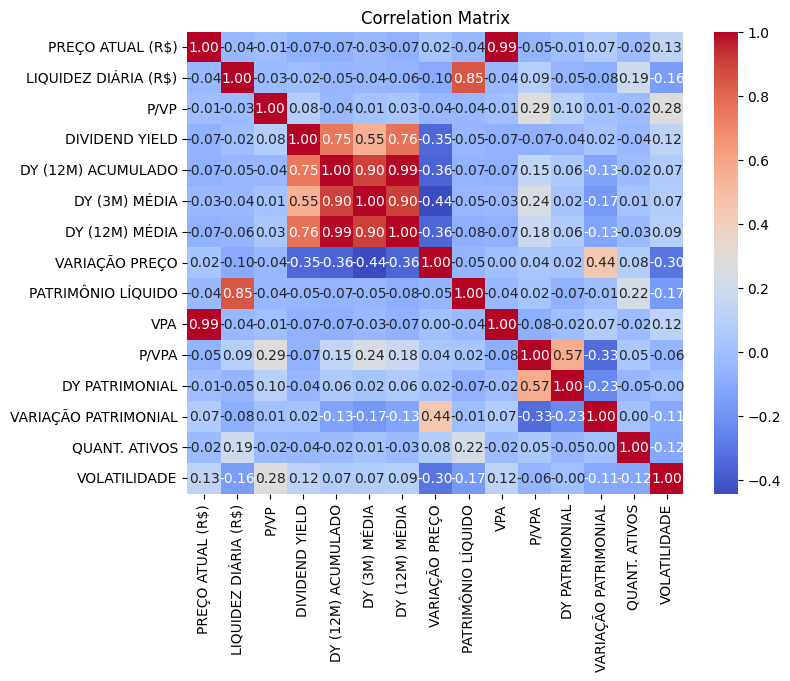

In [3]:
df = load_data()

preprocessing(df)

df_formatted = remove_rows_with_nan(df)

correlation_matrix = df_formatted.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Pela análise da matriz acima, encontramos as seguintes correlações relevantes:

DIVIDEND YIELD      (0.75 | 0.55 | 0.76) = 68.66
DY (12M) ACUMULADO  (0.75 | 0.90 | 0.99) = 88
DY (3M) MEDIA       (0.55 | 0.90 | 0.90) = 78.33
DY (12M) MEDIA      (0.76 | 0.99 | 0.90) = 88.33

Dessas, será mantido apenas o DY (12M) MEDIA, por ter uma maior média de correlação com os demais, e pelo fato desse dado demostrar um panorama geral do dado (média dos 12 meses)

PREÇO ATUAL E VPA

Apresentam uma forte correlação apenas entre si. Além disso, a correlação com todas as outras colunas é baixa e praticamente iguais entre si.

LIQUIDEZ DIÁRIA E PATRIMÔNIO LÍQUIDO

Removida a coluna PATRIMÔNIO LÍQUIDO pelo mesmo caso que o PREÇO ATUAL E VPA

P/VPA E DY PATRIMONIAL

Existe uma relação considerável entre essas 2 variáveis. Ainda, o P/VPA tem uma considerável associação negativa com a VARIAÇÃO PATRIMONIAL, logo, o removeremos

VARIAÇÃO PATRIMONIAL E VARIAÇÃO DO PREÇO

Colunas com uma certa correlação

Removeremos a VARIAÇÃO DO PREÇO por ela também ter uma certa relação negativa com a VOLATILIDADE(-0.3) e com o DY (12M) MEDIA(-0.36)

C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\2349534989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, inplace=True)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\2349534989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, inplace=True)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\2349534989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=

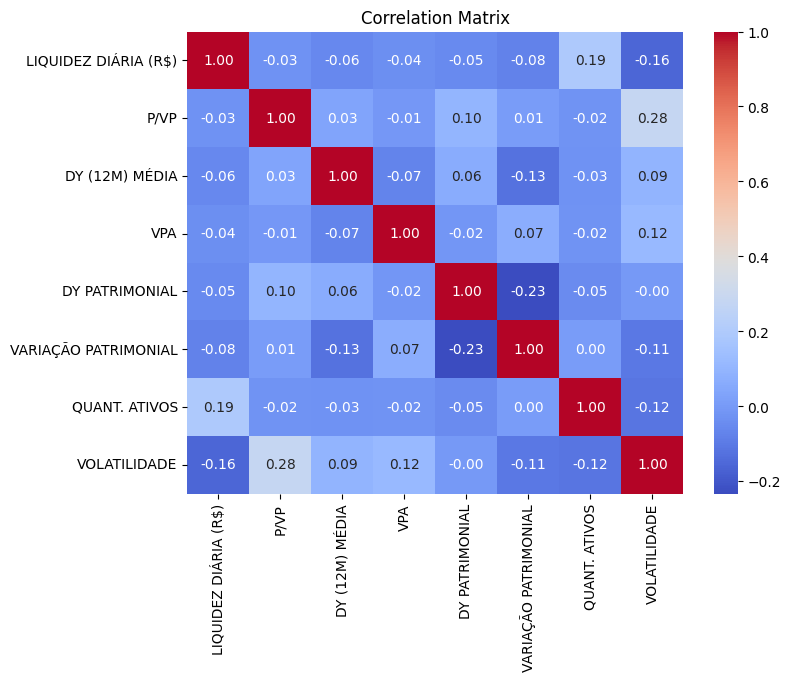

In [4]:
remove_column(df_formatted, 'DIVIDEND YIELD')
remove_column(df_formatted, 'DY (12M) ACUMULADO')
remove_column(df_formatted, 'DY (3M) MÉDIA')

remove_column(df_formatted, 'PREÇO ATUAL (R$)')

remove_column(df_formatted, 'PATRIMÔNIO LÍQUIDO')

remove_column(df_formatted, 'P/VPA')

remove_column(df_formatted, 'VARIAÇÃO PREÇO')

correlation_matrix = df_formatted.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [5]:
remove_column(df, 'DIVIDEND YIELD')
remove_column(df, 'DY (12M) ACUMULADO')
remove_column(df, 'DY (3M) MÉDIA')
remove_column(df, 'PREÇO ATUAL (R$)')
remove_column(df, 'PATRIMÔNIO LÍQUIDO')
remove_column(df, 'P/VPA')
remove_column(df, 'VARIAÇÃO PREÇO')

df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

df4 = df.copy()
df5 = df.copy()
df6 = df.copy()

dfR = df.copy()

In [6]:
df_test1 = df1[df1['TIPO'] == '?']
remove_column(df_test1, 'FUNDOS')
remove_column(df_test1, 'TIPO')

df1 = remove_rows_with_nan(df1)
df1 = df1[df1['TIPO'] != '?']

accuracy1, predicted_tipo1 = createDecisionTree(df1, df_test1)

C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\2349534989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, inplace=True)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\2349534989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, inplace=True)


In [7]:
columns_to_fill = ['LIQUIDEZ DIÁRIA (R$)', 'P/VP', 'DY (12M) MÉDIA', 'VPA', 'DY PATRIMONIAL', 
            'VARIAÇÃO PATRIMONIAL', 'QUANT. ATIVOS', 'VOLATILIDADE', 'NUM. COTISTAS']
df2[columns_to_fill] = df2[columns_to_fill].fillna(df2[columns_to_fill].mean())

df2 = df2.dropna(subset=['TIPO'])

df_test2 = df2[df2['TIPO'] == '?']
remove_column(df_test2, 'FUNDOS')
remove_column(df_test2, 'TIPO')

df2 = df2[df2['TIPO'] != '?']

accuracy2, predicted_tipo2 = createDecisionTree(df2, df_test2)

C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\1474183596.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[columns_to_fill] = df2[columns_to_fill].fillna(df2[columns_to_fill].mean())
C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\2349534989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, inplace=True)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\2349534989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [8]:
df3des = df3[df3['TIPO'] == 'DESENVOLVIMENTO']
df3mis = df3[df3['TIPO'] == 'MISTO']
df3tij = df3[df3['TIPO'] == 'TIJOLO']
df3sho = df3[df3['TIPO'] == 'SHOPPING']
df3pap = df3[df3['TIPO'] == 'PAPEL']

df3des = df3des.fillna(df3des.mean())
df3mis = df3mis.fillna(df3mis.mean())
df3tij = df3tij.fillna(df3tij.mean())
df3sho = df3sho.fillna(df3sho.mean())
df3pap = df3pap.fillna(df3pap.mean())

combined_df = pd.concat([df3des, df3mis, df3tij, df3sho, df3pap])

df_test3 = df3[df3['TIPO'] == '?']
df_test3 = df_test3.fillna(combined_df.mean())

remove_column(df_test3, 'FUNDOS')
remove_column(df_test3, 'TIPO')

accuracy3, predicted_tipo3 = createDecisionTree(combined_df, df_test3)

df3 = combined_df.copy()

C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\81037489.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3des = df3des.fillna(df3des.mean())
C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\81037489.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3mis = df3mis.fillna(df3mis.mean())
C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\81037489.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3tij = df3tij.fillna(df3tij.mean())
C:\Users\joaoc\AppData\Local\Temp\ipykernel

In [9]:
df_test4 = df4[df4['TIPO'] == '?']
remove_column(df_test4, 'FUNDOS')
remove_column(df_test4, 'TIPO')

df4 = remove_rows_with_nan(df4)
df4 = df4[df4['TIPO'] != '?']

df4f = balanceDataframe(df4)

accuracy4, predicted_tipo4 = createDecisionTree(df4f, df_test4)

C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\2349534989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, inplace=True)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\2349534989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, inplace=True)


In [10]:
columns_to_fill = ['LIQUIDEZ DIÁRIA (R$)', 'P/VP', 'DY (12M) MÉDIA', 'VPA', 'DY PATRIMONIAL', 
            'VARIAÇÃO PATRIMONIAL', 'QUANT. ATIVOS', 'VOLATILIDADE', 'NUM. COTISTAS']
df5[columns_to_fill] = df5[columns_to_fill].fillna(df5[columns_to_fill].mean())

df5 = df5.dropna(subset=['TIPO'])

df_test5 = df5[df5['TIPO'] == '?']
remove_column(df_test5, 'FUNDOS')
remove_column(df_test5, 'TIPO')

df5 = df5[df5['TIPO'] != '?']

df5f = balanceDataframe(df5)

accuracy5, predicted_tipo5 = createDecisionTree(df5f, df_test5)

C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\126806549.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df5[columns_to_fill] = df5[columns_to_fill].fillna(df5[columns_to_fill].mean())
C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\2349534989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, inplace=True)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\2349534989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
df6des = df6[df6['TIPO'] == 'DESENVOLVIMENTO']
df6mis = df6[df6['TIPO'] == 'MISTO']
df6tij = df6[df6['TIPO'] == 'TIJOLO']
df6sho = df6[df6['TIPO'] == 'SHOPPING']
df6pap = df6[df6['TIPO'] == 'PAPEL']

df6des = df6des.fillna(df6des.mean())
df6mis = df6mis.fillna(df6mis.mean())
df6tij = df6tij.fillna(df6tij.mean())
df6sho = df6sho.fillna(df6sho.mean())
df6pap = df6pap.fillna(df6pap.mean())

df6a = pd.concat([df6tij, df6pap, df6sho, df6mis, df6des])

df6f = balanceDataframe(df6a)

df_test6 = df6[df6['TIPO'] == '?']
df_test6 = df_test6.fillna(df6f.mean())

remove_column(df_test6, 'FUNDOS')
remove_column(df_test6, 'TIPO')

accuracy6, predicted_tipo6 = createDecisionTree(df6f, df_test6)

C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\4246225046.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df6des = df6des.fillna(df6des.mean())
C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\4246225046.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df6mis = df6mis.fillna(df6mis.mean())
C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\4246225046.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df6tij = df6tij.fillna(df6tij.mean())
C:\Users\joaoc\AppData\Local\Temp\ipy

In [12]:
print("Predicted 'TIPO1' values:")
print(predicted_tipo1)
print(f"Accuracy of the Decision Tree Classifier 1: {accuracy1:.2f}\n")

print("Predicted 'TIPO2' values:")
print(predicted_tipo2)
print(f"Accuracy of the Decision Tree Classifier 2: {accuracy2:.2f}\n")

print("Predicted 'TIPO3' values:")
print(predicted_tipo3)
print(f"Accuracy of the Decision Tree Classifier 3: {accuracy3:.2f}\n")

print("Predicted 'TIPO4' values:")
print(predicted_tipo4)
print(f"Accuracy of the Decision Tree Classifier 4: {accuracy4:.2f}\n")

print("Predicted 'TIPO5' values:")
print(predicted_tipo5)
print(f"Accuracy of the Decision Tree Classifier 5: {accuracy5:.2f}\n")

print("Predicted 'TIPO6' values:")
print(predicted_tipo6)
print(f"Accuracy of the Decision Tree Classifier 6: {accuracy6:.2f}\n")

Predicted 'TIPO1' values:
['TIJOLO' 'MISTO' 'TIJOLO' 'SHOPPING' 'TIJOLO']
Accuracy of the Decision Tree Classifier 1: 0.70

Predicted 'TIPO2' values:
['PAPEL' 'MISTO' 'TIJOLO' 'SHOPPING' 'SHOPPING']
Accuracy of the Decision Tree Classifier 2: 0.49

Predicted 'TIPO3' values:
['TIJOLO' 'TIJOLO' 'TIJOLO' 'SHOPPING' 'TIJOLO']
Accuracy of the Decision Tree Classifier 3: 0.67

Predicted 'TIPO4' values:
['DESENVOLVIMENTO' 'PAPEL' 'TIJOLO' 'MISTO' 'SHOPPING']
Accuracy of the Decision Tree Classifier 4: 0.69

Predicted 'TIPO5' values:
['PAPEL' 'MISTO' 'SHOPPING' 'TIJOLO' 'SHOPPING']
Accuracy of the Decision Tree Classifier 5: 0.52

Predicted 'TIPO6' values:
['TIJOLO' 'TIJOLO' 'TIJOLO' 'TIJOLO' 'SHOPPING']
Accuracy of the Decision Tree Classifier 6: 0.71



In [13]:
#fig, ax = plt.subplots(figsize=(150, 100))  # Adjust size as needed
#tree.plot_tree(clf, 
               #feature_names=X.columns,  # Your features here
               #class_names=clf.classes_,  # Your classes here
               #filled=True, 
               #rounded=True, 
               #ax=ax)
#plt.show()

In [14]:
qnt1 = count_distinct_elements(df1, 'TIPO')
print("df1\n", qnt1)

qnt2 = count_distinct_elements(df2, 'TIPO')
print("\ndf2\n", qnt2)

qnt3 = count_distinct_elements(df3, 'TIPO')
print("\ndf3\n", qnt3)

qnt4 = count_distinct_elements(df4f, 'TIPO')
print("\ndf4\n", qnt4)

qnt5 = count_distinct_elements(df5f, 'TIPO')
print("\ndf5\n", qnt5)

qnt6 = count_distinct_elements(df6f, 'TIPO')
print("\ndf6\n", qnt6)

df1
 TIJOLO             161
PAPEL               63
SHOPPING            18
MISTO               16
DESENVOLVIMENTO     12
Name: TIPO, dtype: int64

df2
 TIJOLO             241
PAPEL               82
DESENVOLVIMENTO     40
MISTO               27
SHOPPING            24
Name: TIPO, dtype: int64

df3
 TIJOLO             241
PAPEL               82
DESENVOLVIMENTO     40
MISTO               27
SHOPPING            24
Name: TIPO, dtype: int64

df4
 TIJOLO             81
PAPEL              63
SHOPPING           36
MISTO              32
DESENVOLVIMENTO    24
Name: TIPO, dtype: int64

df5
 TIJOLO             121
PAPEL               82
DESENVOLVIMENTO     80
MISTO               54
SHOPPING            48
Name: TIPO, dtype: int64

df6
 TIJOLO             121
PAPEL               82
DESENVOLVIMENTO     80
MISTO               54
SHOPPING            48
Name: TIPO, dtype: int64


REGRESSÃO

In [15]:
#dfR

dfRdes = dfR[dfR['TIPO'] == 'DESENVOLVIMENTO']
dfRmis = dfR[dfR['TIPO'] == 'MISTO']
dfRtij = dfR[dfR['TIPO'] == 'TIJOLO']
dfRsho = dfR[dfR['TIPO'] == 'SHOPPING']
dfRpap = dfR[dfR['TIPO'] == 'PAPEL']

dfRdes = dfRdes.fillna(dfRdes.mean())
dfRmis = dfRmis.fillna(dfRmis.mean())
dfRtij = dfRtij.fillna(dfRtij.mean())
dfRsho = dfRsho.fillna(dfRsho.mean())
dfRpap = dfRpap.fillna(dfRpap.mean())

dfRa = pd.concat([dfRtij, dfRpap, dfRsho, dfRmis, dfRdes])

dfRf = balanceDataframe(dfRa)

df_testR = dfR[dfR['TIPO'] == '?']
df_testR = df_testR.fillna(dfRf.mean())

remove_column(df_testR, 'FUNDOS')
remove_column(df_testR, 'TIPO')

# Encoding categorical 'TIPO' column
le = LabelEncoder()
dfRf['TIPO'] = le.fit_transform(dfRf['TIPO'])

cont = countNaNValues(dfRf)
print(cont)
dfRf = remove_rows_with_nan(dfRf)

# Splitting into features and target variable
XR = dfRf.drop(columns=['FUNDOS', 'TIPO'])  # Features
yR = dfRf['TIPO']  # Target

# Handling missing values
# You can use different strategies to handle missing values here

# Train-test split
X_trainR, X_testR, y_trainR, y_testR = train_test_split(XR, yR, test_size=0.2, random_state=42)

# Initializing and training the model
model = LogisticRegression(max_iter=3000)
model.fit(X_trainR, y_trainR)

# Making predictions
y_predR = model.predict(X_testR)

# Evaluating the model
accuracyR = accuracy_score(y_testR, y_predR)
print(f"Accuracy R: {accuracyR}")

C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\403721740.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfRdes = dfRdes.fillna(dfRdes.mean())
C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\403721740.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfRmis = dfRmis.fillna(dfRmis.mean())
C:\Users\joaoc\AppData\Local\Temp\ipykernel_14000\403721740.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfRtij = dfRtij.fillna(dfRtij.mean())
C:\Users\joaoc\AppData\Local\Temp\ipyk

FUNDOS                  0
TIPO                    0
LIQUIDEZ DIÁRIA (R$)    0
P/VP                    0
DY (12M) MÉDIA          0
VPA                     0
DY PATRIMONIAL          0
VARIAÇÃO PATRIMONIAL    0
QUANT. ATIVOS           0
VOLATILIDADE            0
NUM. COTISTAS           0
dtype: int64


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values